In [67]:
import torch
from PIL import Image
import torchvision
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
import yaml

In [6]:
IMAGES_FOLDER = './dataset/Images'
# ANNOTATION_FOLDER = './dataset/Annotation'

NEW_IMG_FOLDER = './resized_dataset/Images'
NEW_ANN_FOLDER = './resized_dataset/Annotation'
class_mapper = json.load(open('class_mapper.json'))

In [7]:
images_df = pd.DataFrame()

In [8]:
def getShape(img_path):
    im = plt.imread(img_path)
    return im.shape

In [9]:
for dirpath, dirnames, filenames in os.walk(IMAGES_FOLDER):
    rows = []
    for i in filenames:
        path = os.path.join(dirpath[17:], i)
        
#         w, h, _ = getShape(os.path.join(IMAGES_FOLDER, path))
        w, h = [0, 0]
        row = (i, dirpath[17:], path, w, h)
        
        rows.append(row)
        
    images_df = images_df.append(rows)
    
images_df.columns = ['img', 'folder', 'path', 'width', 'height']
images_df = images_df.reset_index()
images_df = images_df.drop(columns='index')

In [10]:
images_df.head()

,img,folder,path,width,height
0,n02085620_10074.jpg,n02085620-Chihuahua,n02085620-Chihuahua\n02085620_10074.jpg,0,0
1,n02085620_10131.jpg,n02085620-Chihuahua,n02085620-Chihuahua\n02085620_10131.jpg,0,0
2,n02085620_10621.jpg,n02085620-Chihuahua,n02085620-Chihuahua\n02085620_10621.jpg,0,0
3,n02085620_1073.jpg,n02085620-Chihuahua,n02085620-Chihuahua\n02085620_1073.jpg,0,0
4,n02085620_10976.jpg,n02085620-Chihuahua,n02085620-Chihuahua\n02085620_10976.jpg,0,0


In [7]:
SIZE = max(round(images_df['width'].mean()), round(images_df['height'].mean()))

In [50]:
#RESHAPING IMGS


# for img_data in images_df.values:
#     file_name = img_data[0]
#     folder_name = img_data[1]
#     path = os.path.join(IMAGES_FOLDER, img_data[2])
#     img = plt.imread(path)
#     img = cv2.resize(img, (SIZE,SIZE))
#     folder_path = os.path.join(NEW_IMG_FOLDER, folder_name)
#     file_path = os.path.join(folder_path, file_name)
#     os.makedirs(folder_path, exist_ok=True)
#     img = plt.imsave(file_path, img)
# #     break

In [17]:
images_df['folder'] = images_df['folder'].apply(lambda x: x[10:].lower())

In [18]:
images_df['class'] = images_df['folder'].apply(lambda x: class_mapper[x])

In [22]:
train, test = train_test_split(images_df, test_size=0.2, stratify = images_df['class'])

In [38]:
images_df['type'] = 'train'

In [58]:
images_df.iloc[test.index, 6] = 'test'

,img,folder,path,width,height,class,type
3,n02085620_1073.jpg,chihuahua,n02085620-Chihuahua\n02085620_1073.jpg,0,0,0,test
8,n02085620_11337.jpg,chihuahua,n02085620-Chihuahua\n02085620_11337.jpg,0,0,0,test
13,n02085620_11948.jpg,chihuahua,n02085620-Chihuahua\n02085620_11948.jpg,0,0,0,test
14,n02085620_1205.jpg,chihuahua,n02085620-Chihuahua\n02085620_1205.jpg,0,0,0,test
27,n02085620_14413.jpg,chihuahua,n02085620-Chihuahua\n02085620_14413.jpg,0,0,0,test
...,...,...,...,...,...,...,...
20555,n02116738_849.jpg,african_hunting_dog,n02116738-African_hunting_dog\n02116738_849.jpg,0,0,119,test
20566,n02116738_8945.jpg,african_hunting_dog,n02116738-African_hunting_dog\n02116738_8945.jpg,0,0,119,test
20570,n02116738_9333.jpg,african_hunting_dog,n02116738-African_hunting_dog\n02116738_9333.jpg,0,0,119,test
20572,n02116738_9748.jpg,african_hunting_dog,n02116738-African_hunting_dog\n02116738_9748.jpg,0,0,119,test


In [61]:
# # QUALITY DECREASING

# quality_list = [5, 15, 25, 35, 50, 70]

# for quality in quality_list:
    
#     qual_folder = f'./resized_dataset/Images_{quality}'
    
#     for img_data in images_df.values:
        
#         img_file_name = img_data[0]
#         img_path = img_data[2]
#         isTrain = img_data[6] == 'train'
        
#         if isTrain:
#             img_folder_name = 'train'
#         else:
#             img_folder_name = 'test'
        
#         path = os.path.join(NEW_IMG_FOLDER, img_path)
        
#         image = Image.open(path)
        
        
#         folder_path = os.path.join(qual_folder, img_folder_name)
        
#         file_path = os.path.join(folder_path, img_file_name)
        
#         os.makedirs(folder_path, exist_ok = True)
        
#         image.save(file_path, "JPEG", quality = quality)

<AxesSubplot:ylabel='Frequency'>

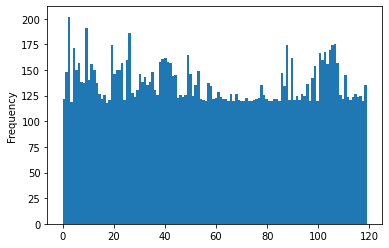

In [27]:
train['class'].plot(kind='hist', bins=120)

<AxesSubplot:ylabel='Frequency'>

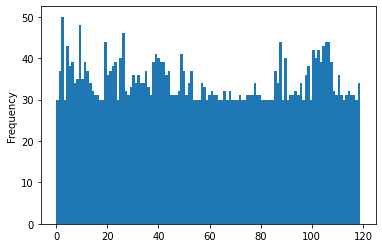

In [30]:
test['class'].plot(kind='hist', bins=120)

## Create yaml files for yolov5 train

In [62]:
#Structure

# train: PATH
# val: PATH
# test: PATH (may be skipped)

# nc: NUMBER OF CLASSES
# names: CLASSES LABELES

In [65]:
classes_labels = [i for i in class_mapper.keys()]

In [91]:
quality_list = [5, 15, 25, 35, 50, 70]

for quality in quality_list:
    
    cur_path = os.getcwd()
    
    qual_folder = os.path.join(cur_path, 'resized_dataset', f'Images_{quality}')
    
    yaml_text = f'''
                train: {os.path.join(qual_folder, 'train', 'images')}
                val: {os.path.join(qual_folder, 'test', 'images')}
                
                nc: {len(classes_labels)}
                names: {classes_labels}
                '''
    print(yaml_text, file = open(os.path.join(qual_folder, 'data.yaml'), 'w'))

In [74]:
shutil.move()

<module 'shutil' from 'C:\\Users\\COM\\anaconda3\\lib\\shutil.py'>

In [76]:
images_pathes = [f'Images_{i}' for i in quality_list]

for file in images_pathes:
    train_path = os.path.join(cur_path, 'resized_dataset', file, 'train')
    test_path = os.path.join(cur_path, 'resized_dataset', file, 'test')
    
    new_img_name = os.path.join(cur_path, 'resized_dataset', file, 'images')
    for path in [train_path, test_path]:
        os.rename(path, new_img_name)
        os.mkdir(path)
        shutil.move(new_img_name, path)
    
    
    

In [90]:
ANN_FOLDER = os.path.join(cur_path, 'resized_dataset', 'Annotation_yolo')

for file in images_pathes:
    train_path = os.path.join(cur_path, 'resized_dataset', file, 'train')
    test_path = os.path.join(cur_path, 'resized_dataset', file, 'test')
    
    
    for path in [train_path, test_path]:
        new_ann_name = os.path.join(path, 'labels')
        
        for _,_,filenames in os.walk(path):
            filenames = [i[:-4] for i in filenames]
        
        
        os.mkdir(new_ann_name)
        
        for file in filenames:
            src_path = os.path.join(ANN_FOLDER, file)
            dest_path = os.path.join(new_ann_name)
            shutil.copy(src_path, dest_path)
            

In [77]:
train_path = os.path.join(cur_path, 'resized_dataset', file, 'train','images')

In [78]:
import glob

In [89]:
 filenames[0][:-4]

'n02085620_10074'

In [94]:
for file in images_pathes:
    train_path = os.path.join(cur_path, 'resized_dataset', file, 'train')
    test_path = os.path.join(cur_path, 'resized_dataset', file, 'test')
    
    
    for path in [train_path, test_path]:
        ann_name = os.path.join(path, 'labels')
        
        for _,_,filenames in os.walk(ann_name):
            pass
        
        for file in filenames:
            file = os.path.join(ann_name, file)
            new_name = os.path.join(ann_name, file + '.txt')
            os.rename(file, new_name)
            